# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [2]:
banana_pixel_env_path = "C:/Users/jofan/rl/deep-reinforcement-learning/p1_navigation/VisualBanana_Windows_x86_64/Banana.exe"
env = UnityEnvironment(file_name=banana_pixel_env_path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
Frame look like:


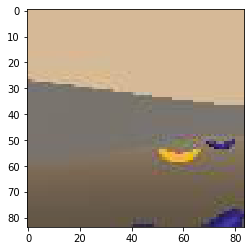

Frame have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
frame = env_info.visual_observations[0]
print('Frame look like:')
plt.imshow(np.squeeze(frame))
plt.show()
frame_size = frame.shape
print('Frame have shape:', frame.shape)

We wrap the current environment into another banana pixel environment which uses the past n frames as state.

In [36]:
import importlib
import navigation_pixels_env
importlib.reload(navigation_pixels_env)
wrapped_env = navigation_pixels_env.BananaPixelEnv(env)

In [37]:
state = wrapped_env.reset()
state_size = state.shape
state = wrapped_env.step(0)
state

(array([[[[[0.83921569, 0.83921569, 0.83921569, ..., 0.83921569,
            0.83921569, 0.83921569],
           [0.83921569, 0.83921569, 0.83921569, ..., 0.83921569,
            0.83921569, 0.83921569],
           [0.83921569, 0.83921569, 0.83921569, ..., 0.83921569,
            0.83921569, 0.83921569],
           ...,
           [0.79607843, 0.79607843, 0.79607843, ..., 0.80392157,
            0.80392157, 0.80392157],
           [0.79607843, 0.79607843, 0.79607843, ..., 0.80392157,
            0.80392157, 0.80392157],
           [0.79215686, 0.79215686, 0.79215686, ..., 0.8       ,
            0.8       , 0.8       ]],
 
          [[0.83921569, 0.83921569, 0.83921569, ..., 0.83921569,
            0.83921569, 0.83921569],
           [0.83921569, 0.83921569, 0.83921569, ..., 0.83921569,
            0.83921569, 0.83921569],
           [0.83921569, 0.83921569, 0.83921569, ..., 0.83921569,
            0.83921569, 0.83921569],
           ...,
           [0.79607843, 0.79607843, 0.79607843,

### 3. Train DQN Agent

In [38]:
import dqn_agent
import importlib
importlib.reload(dqn_agent)
import model
from matplotlib.pylab import plt

In [39]:
# Start agent
agent = dqn_agent.Agent(state_size, action_size, 100, is_pixel=True)


Convolution output size: 2304
Convolution output size: 2304


In [40]:
x = np.int32(32)
np.int32(x).astype(np.int32)

32

In [41]:
# Run DQN
scores = dqn_agent.dqn(agent, wrapped_env, is_pixel=True)

Episode 100	Average Score: -0.02
Episode 142	Average Score: 0.053

KeyboardInterrupt: 

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    next_state, reward, done, _ = wrapped_env.step(action)
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
#env.close()